# U.S. Chronic Disease Indicators (CDI) Dataset
## Descriptive Analysis
source: https://data.cdc.gov/Chronic-Disease-Indicators/U-S-Chronic-Disease-Indicators-CDI-/g4ie-h725/about_data

In [2]:
# load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# Load the dataset into a pandas dataframe and cache it
df = pd.read_csv('us_cdi_dataset.csv')
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,5,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,8,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,11,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,13,AST,AST3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,26,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN


In [3]:
# print the shape of the dataset
print('The dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The dataset has 1185676 rows and 34 columns


In [4]:
# print the data types of the columns
print('The data types of the columns are: {}'.format(df.dtypes))

The data types of the columns are: YearStart                      int64
YearEnd                        int64
LocationAbbr                  object
LocationDesc                  object
DataSource                    object
Topic                         object
Question                      object
Response                     float64
DataValueUnit                 object
DataValueType                 object
DataValue                     object
DataValueAlt                 float64
DataValueFootnoteSymbol       object
DatavalueFootnote             object
LowConfidenceLimit           float64
HighConfidenceLimit          float64
StratificationCategory1       object
Stratification1               object
StratificationCategory2      float64
Stratification2              float64
StratificationCategory3      float64
Stratification3              float64
GeoLocation                   object
ResponseID                   float64
LocationID                     int64
TopicID                       object
Que

In [5]:
# print the number of missing values in each column, and the percentage of missing values in each column
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / df.shape[0]) * 100
missing_values_df = pd.DataFrame({'missing_values': missing_values, 'missing_values_percentage': missing_values_percentage})
print('The number of missing values in each column, and the percentage of missing values in each column are:')
print(missing_values_df)

The number of missing values in each column, and the percentage of missing values in each column are:
                           missing_values  missing_values_percentage
YearStart                               0                   0.000000
YearEnd                                 0                   0.000000
LocationAbbr                            0                   0.000000
LocationDesc                            0                   0.000000
DataSource                              0                   0.000000
Topic                                   0                   0.000000
Question                                0                   0.000000
Response                          1185676                 100.000000
DataValueUnit                      152123                  12.830065
DataValueType                           0                   0.000000
DataValue                          378734                  31.942453
DataValueAlt                       381098                  32.141833
D

In [6]:
# remove columns with 100% missing values
df_clean = df.dropna(axis=1, how='all')

In [7]:
# print the number of unique values in each column
unique_values = df_clean.nunique()
print('The number of unique values in each column are:')
print(unique_values)

The number of unique values in each column are:
YearStart                       16
YearEnd                         16
LocationAbbr                    55
LocationDesc                    55
DataSource                      31
Topic                           17
Question                       203
DataValueUnit                   12
DataValueType                   19
DataValue                    50436
DataValueAlt                 41213
DataValueFootnoteSymbol         17
DatavalueFootnote               18
LowConfidenceLimit           22464
HighConfidenceLimit          24000
StratificationCategory1          3
Stratification1                 11
GeoLocation                     54
LocationID                      55
TopicID                         17
QuestionID                     203
DataValueTypeID                 19
StratificationCategoryID1        3
StratificationID1               13
dtype: int64


In [8]:
# explore data for Topic = 'Older Adults'
df_older_adults = df_clean[df_clean['Topic'] == 'Older Adults']
print('The dataset for Older Adults has {} rows and {} columns'.format(df_older_adults.shape[0], df_older_adults.shape[1]))

# print the number of missing values in each column, and the percentage of missing values in each column for the dataset for Older Adults
missing_values_older_adults = df_older_adults.isnull().sum()
missing_values_percentage_older_adults = (missing_values_older_adults / df_older_adults.shape[0]) * 100
missing_values_older_adults_df = pd.DataFrame({'missing_values': missing_values_older_adults, 'missing_values_percentage': missing_values_percentage_older_adults})
print('The number of missing values in each column, and the percentage of missing values in each column for the dataset for Older Adults are:')
print(missing_values_older_adults_df)

# print the number of unique values in each column for the dataset for Older Adults
unique_values_older_adults = df_older_adults.nunique()
print('The number of unique values in each column for the dataset for Older Adults are:')
print(unique_values_older_adults)

The dataset for Older Adults has 26316 rows and 24 columns
The number of missing values in each column, and the percentage of missing values in each column for the dataset for Older Adults are:
                           missing_values  missing_values_percentage
YearStart                               0                   0.000000
YearEnd                                 0                   0.000000
LocationAbbr                            0                   0.000000
LocationDesc                            0                   0.000000
DataSource                              0                   0.000000
Topic                                   0                   0.000000
Question                                0                   0.000000
DataValueUnit                        4576                  17.388661
DataValueType                           0                   0.000000
DataValue                            7065                  26.846785
DataValueAlt                         7065      

In [14]:
# print column values without truncation

pd.set_option('display.max_colwidth', None)

In [15]:

# Select best columns for descriptive analysis
# YearStart, YearEnd, Question, DataValueType,  DataValueUnit, DataValue

df_older_adults_selected = df_older_adults[['YearStart', 'YearEnd', 'Question', 'DataValueType', 'DataValueUnit', 'DataValue']]
df_older_adults_selected.head()


,YearStart,YearEnd,Question,DataValueType,DataValueUnit,DataValue
461302,2017,2017,Hospitalization for hip fracture among Medicare-eligible persons aged >= 65 years,Number,NaN,NaN
461308,2016,2016,Hospitalization for hip fracture among Medicare-eligible persons aged >= 65 years,Number,NaN,81
461309,2016,2016,Hospitalization for hip fracture among Medicare-eligible persons aged >= 65 years,Number,NaN,23219
461313,2013,2013,Hospitalization for hip fracture among Medicare-eligible persons aged >= 65 years,Crude Rate,"cases per 1,000",7.61
461327,2011,2011,Hospitalization for hip fracture among Medicare-eligible persons aged >= 65 years,Age-adjusted Rate,"cases per 1,000",NaN


In [21]:
# Group by Question, DataValueType, DataValueUnit and calculate the mean DataValue for each group
df_older_adults_selected['DataValue'] = pd.to_numeric(df_older_adults_selected['DataValue'], errors='coerce')
df_older_adults_grouped = df_older_adults_selected.groupby(['Question', 'DataValueType', 'DataValueUnit']).agg({'DataValue': 'mean'}).reset_index()
# df_older_adults_grouped.head()

# same as above, but this time add StartYear to the groupby and pivot the table to have StartYear as the index
df_older_adults_grouped = df_older_adults_selected.groupby(['Question', 'DataValueType', 'DataValueUnit', 'YearStart']).agg({'DataValue': 'mean'}).reset_index()
df_older_adults_grouped_pivot = df_older_adults_grouped.pivot_table(index=['Question', 'DataValueType', 'DataValueUnit'], columns='YearStart', values='DataValue').reset_index()
df_older_adults_grouped_pivot.head()

YearStart,Question,DataValueType,DataValueUnit,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Hospitalization for hip fracture among Medicare-eligible persons aged >= 65 years,Age-adjusted Rate,"cases per 1,000",7.706748,7.733720,7.605310,7.745514,8.013627,8.276993,8.848889,8.979208,9.144058,9.200800,8.948059
1,Hospitalization for hip fracture among Medicare-eligible persons aged >= 65 years,Crude Rate,"cases per 1,000",7.467203,7.420546,7.145000,7.170719,7.324746,7.450169,7.881953,7.886007,8.008149,8.043433,7.767632
2,Prevalence of 2 or more chronic conditions among Medicare-enrolled persons aged >= 65 years,Crude Prevalence,%,66.426448,64.728750,65.591563,65.432924,64.771921,64.541320,66.510024,66.322005,67.505623,NaN,NaN
3,Proportion of older adults aged 50-64 years who are up to date on a core set of clinical preventive services,Age-adjusted Prevalence,%,NaN,NaN,21.647782,NaN,22.495254,NaN,21.795932,NaN,19.609790,NaN,26.975166
4,Proportion of older adults aged 50-64 years who are up to date on a core set of clinical preventive services,Crude Prevalence,%,NaN,NaN,21.920000,NaN,23.140614,NaN,22.497260,NaN,20.313214,NaN,28.195172


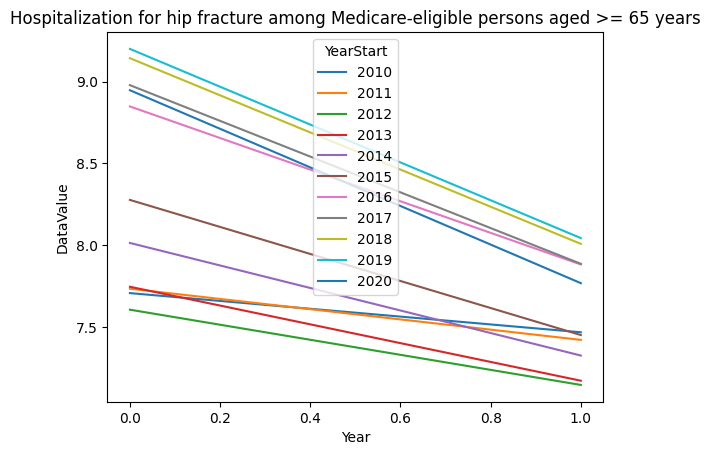

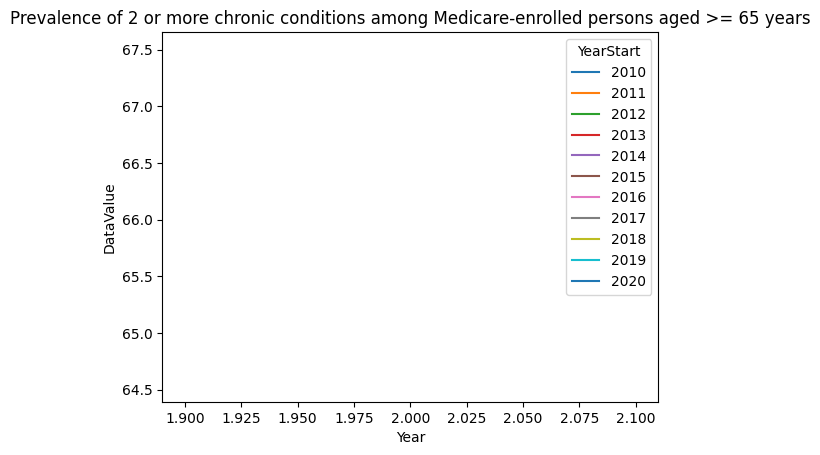

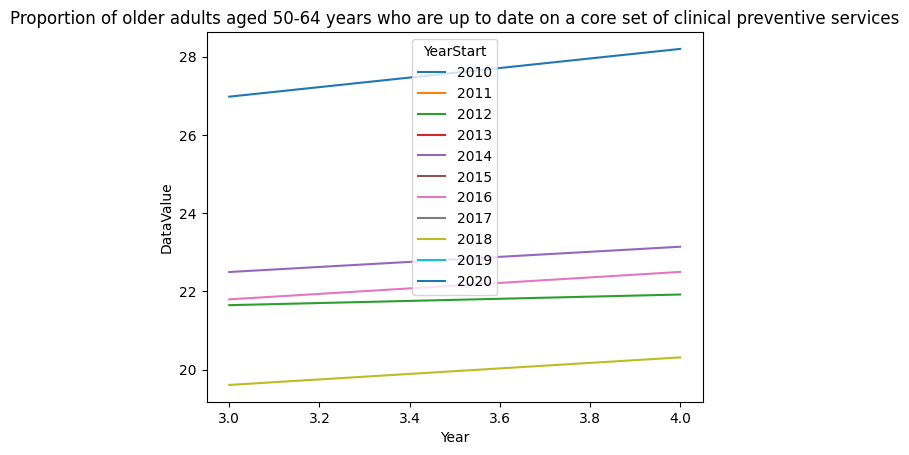

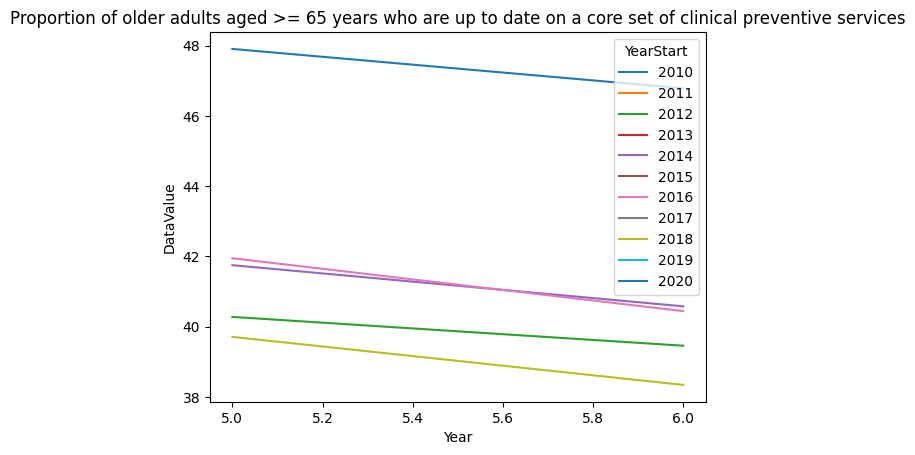

In [24]:
# with YearStart as x-axis and DataValue as y-axis, plot the trend of DataValue for each Question
# for each Question, plot the trend of DataValue over the years
for question in df_older_adults_grouped_pivot['Question'].unique():
    df_question = df_older_adults_grouped_pivot[df_older_adults_grouped_pivot['Question'] == question]
    df_question = df_question.drop(['Question', 'DataValueType', 'DataValueUnit'], axis=1)
    # df_question = df_question.set_index('YearStart')
    df_question.plot()
    plt.title(question)
    plt.xlabel('Year')
    plt.ylabel('DataValue')
    plt.show()